# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [99]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

/var/folders/rb/31f78rzs3r79zqkvbbxk32bw0000gn/T/ipykernel_11677/577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
pd.set_option('display.max_columns', None)
display(df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [9]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [26]:
#결측치 비율
df1=pd.DataFrame({'missing_num':df.isnull().sum()})
df2=pd.DataFrame({'missing_%':(df.isnull().sum() / len(df) *100).round(1)})
df3=pd.merge(df1, df2, how='left',left_index=True, right_index=True)
df4 = df3[df3.missing_num>0]
df5 = df4.sort_values(by=['missing_num'], ascending=False) #디폴트 오름차순
df5


,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

[Text(0, 0, 'jurisdiction_names'),
 Text(1, 0, 'license'),
 Text(2, 0, 'square_feet'),
 Text(3, 0, 'monthly_price'),
 Text(4, 0, 'weekly_price'),
 Text(5, 0, 'host_response_rate'),
 Text(6, 0, 'host_response_time'),
 Text(7, 0, 'security_deposit'),
 Text(8, 0, 'host_acceptance_rate'),
 Text(9, 0, 'review_scores_value'),
 Text(10, 0, 'review_scores_location'),
 Text(11, 0, 'review_scores_checkin'),
 Text(12, 0, 'review_scores_accuracy'),
 Text(13, 0, 'review_scores_communication'),
 Text(14, 0, 'review_scores_cleanliness'),
 Text(15, 0, 'review_scores_rating'),
 Text(16, 0, 'reviews_per_month'),
 Text(17, 0, 'beds'),
 Text(18, 0, 'bedrooms'),
 Text(19, 0, 'bathrooms'),
 Text(20, 0, 'host_identity_verified'),
 Text(21, 0, 'host_listings_count'),
 Text(22, 0, 'host_total_listings_count'),
 Text(23, 0, 'host_verifications'),
 Text(24, 0, 'host_is_superhost'),
 Text(25, 0, 'host_has_profile_pic')]

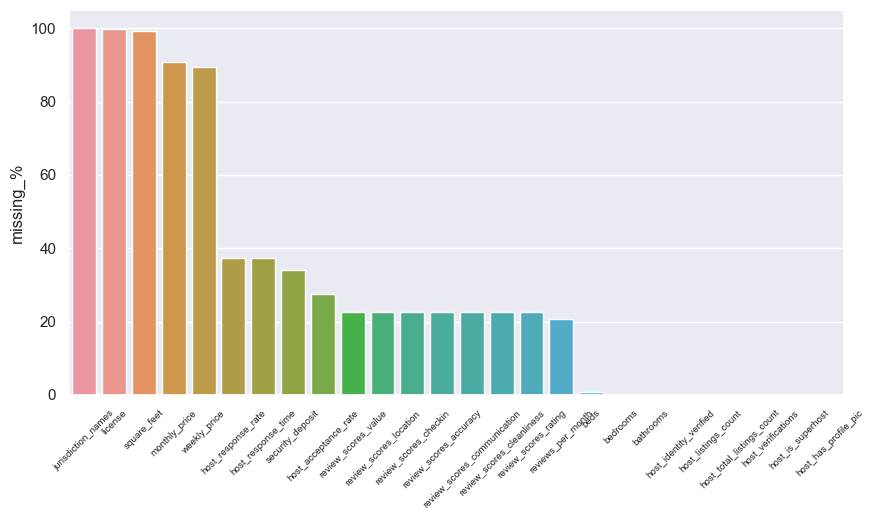

In [75]:
sns.set(rc={'figure.figsize':(10,5)})
nullplot = sns.barplot(x = df5.index, y = 'missing_%',data = df5)
nullplot.set_xticklabels(nullplot.get_xticklabels(),rotation = 45, size = 7)


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [78]:
# Q4
df[df.beds.isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [79]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [80]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

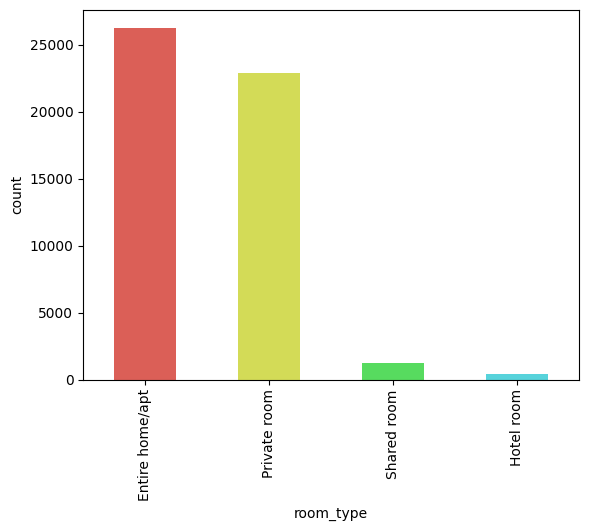

In [108]:
colors = sns.color_palette('hls')
df["room_type"].value_counts().plot(kind = "bar", ylabel='count', color=colors)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

[]

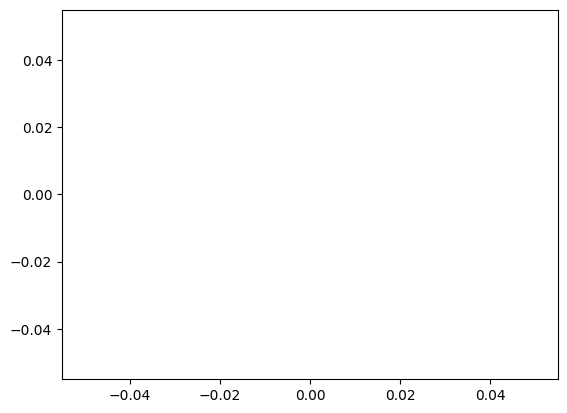

In [109]:
#***비율을 나타내도록 재구성-> 이 문제는 에러 해결을 못했습니다ㅠㅠ
df_test = df["room_type"].value_counts()
plt.plot(kind='bar',ylabel='room_type', xlabel='', df= df_test)
#plt.plot(kind = "bar", ylabel='room_type', xlabel='', df = df["room_type"].value_counts())
#plt.set_ylim=(0, 100)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

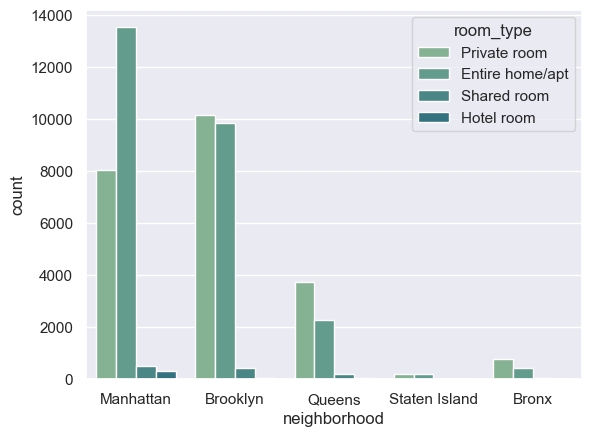

In [75]:
# Q7
sns.countplot(x = "neighborhood", hue = "room_type", data = df) #count plot

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

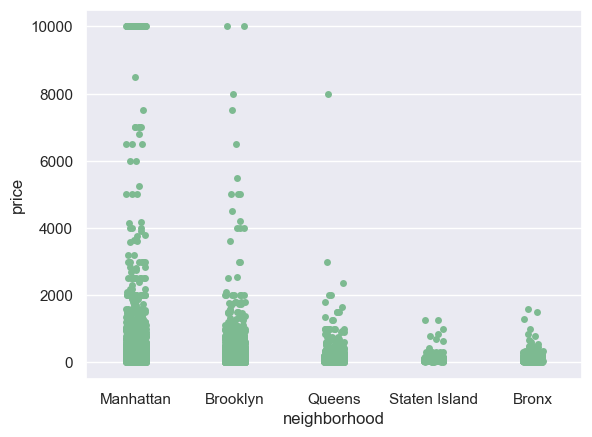

In [79]:
# Q8
sns.stripplot(x = "neighborhood", y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [166]:
# Q9
'''
전체적으로 보았을 때 airbnb의 Entire home/apt의 수가 가장 많지만, manhatten을 제외하고는 private room의 수가 가장 많다. 
다만, manhatten 지역의 방이 다른 지역보다 훨씬 많고 그중에서도 특히 Entire home/apt의 수가 많기 때문에 전체 데이터에서는 이 케이스가 가장 많은 것으로 확인되었다. 
전반적으로 manhatten 지역의 가격이 훨씬 높은데, 이는 물론 원래도 manhatten 지역의 방이 더 비싼 영향도 있겠지만, 특히 manhatten 지역이 Entire home/apt의 경우가 많기 때문에 다른 지역보다 가격이 더 높게 형성되는 영향도 있을 것이다. 
'''





'\n전체적으로 보았을 때 airbnb의 Entire home/apt의 수가 가장 많지만, manhatten을 제외하고는 private room의 수가 가장 많다. \n다만, manhatten 지역의 방이 다른 지역보다 훨씬 많고 그중에서도 특히 Entire home/apt의 수가 많기 때문에 전체 데이터에서는 이 케이스가 가장 많은 것으로 확인되었다. \n전반적으로 manhatten 지역의 가격이 훨씬 높은데, 이는 물론 원래도 manhatten 지역의 방이 더 비싼 영향도 있겠지만, 특히 manhatten 지역이 Entire home/apt의 경우가 많기 때문에 다른 지역보다 가격이 더 높게 형성되는 영향도 있을 것이다. \n'

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

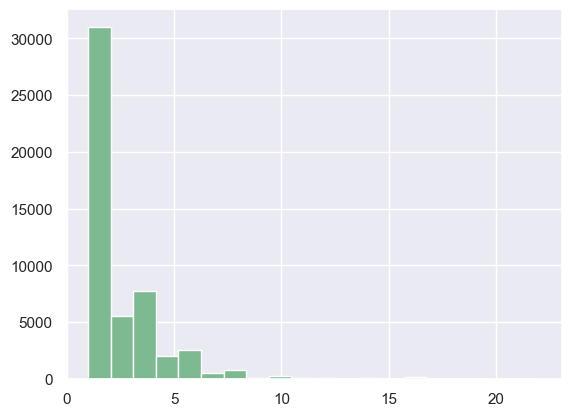

In [167]:
# Q10
plt.hist(x = "accommodates", data = df, bins=20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(array([7.000e+01, 2.140e+03, 7.033e+03, 7.391e+03, 6.234e+03, 4.696e+03,
        4.233e+03, 4.108e+03, 2.502e+03, 2.265e+03, 2.035e+03, 1.131e+03,
        1.594e+03, 5.840e+02, 6.390e+02, 7.620e+02, 2.990e+02, 5.200e+02,
        1.780e+02, 2.420e+02, 2.770e+02, 1.050e+02, 2.050e+02, 5.500e+01,
        1.230e+02, 1.940e+02, 2.900e+01, 9.000e+01, 2.200e+01, 6.600e+01,
        7.900e+01, 8.000e+00, 4.900e+01, 1.300e+01, 3.300e+01, 3.800e+01,
        6.000e+00, 6.900e+01, 1.000e+01, 3.100e+01, 6.400e+01, 6.000e+00,
        2.400e+01, 4.000e+00, 1.300e+01, 2.400e+01, 4.000e+00, 1.100e+01,
        1.000e+01, 1.260e+02]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

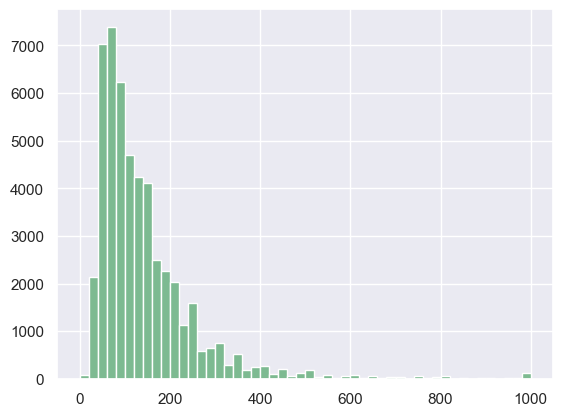

In [168]:
# Q11
plt.hist(x = "price", data = df, range=(0,1000), bins=50)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [10]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

/var/folders/rb/31f78rzs3r79zqkvbbxk32bw0000gn/T/ipykernel_11677/577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [11]:
#Q12
#결측치 25%이상인 경우 칼럼 드랍
over_25 = (df.isnull().sum() / len(df) *100) >= 25
drop_columns = df.columns[over_25]
df_1=df.drop(columns=drop_columns) 
df_1


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.857220,-73.937900,...,NaN,NaN,NaN,f,f,f,flexible,f,f,0.01
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.753620,-73.983770,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.685140,-73.959760,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.747670,-73.975000,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.719100,-73.990400,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.814840,-73.946340,...,NaN,NaN,NaN,f,t,f,flexible,f,f,NaN
50792,42890730,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.769807,-73.987225,...,NaN,NaN,NaN,f,t,f,flexible,f,f,NaN
50793,42891018,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.736252,-74.002622,...,NaN,NaN,NaN,f,t,f,flexible,f,f,NaN
50794,42891637,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,Brooklyn,40.663870,-73.953400,...,NaN,NaN,NaN,f,f,f,flexible,f,f,NaN


In [48]:
#10%~25%인 경우 
over_10_less_25 = ((df_1.isnull().sum() / len(df_1) *100) >= 10) & ((df_1.isnull().sum() / len(df_1) *100) < 25)
drop_rows = df_1.columns[over_10_less_25]

df_temp2 = df_1[drop_rows].dropna()
print("특정 칼럼에 대해 결측치 제거 후 데이터 개수 : ", df_temp2.shape[0])
idx=list(df_temp2.index)

#frame.loc[3]
df_2 = df_1.loc[idx]
df_2



특정 칼럼에 대해 결측치 제거 후 데이터 개수 :  39291


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


In [14]:
df_2.isnull().sum()

id                                    0
host_is_superhost                     1
host_listings_count                   1
host_total_listings_count             1
host_verifications                    1
host_has_profile_pic                  1
host_identity_verified                1
neighborhood                          0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            34
bedrooms                             40
beds                                140
bed_type                              0
amenities                             0
price                                 0
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
has_availability                      0


In [15]:
#10% 미만인 경우
less_10 = ((df_1.isnull().sum() / len(df_1) *100) < 10) & ((df_1.isnull().sum() / len(df_1) *100) > 0)
replace_nan = df_1.columns[less_10]
print(replace_nan)

df_temp3 = df_2[replace_nan] 
df_temp3

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'bathrooms', 'bedrooms', 'beds'],
      dtype='object')


,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,bathrooms,bedrooms,beds
1,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,1.0,0.0,1.0
2,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,1.0,1.0,4.0
3,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,1.0,1.0,1.0
4,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,NaN,1.0,1.0
5,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
50490,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,1.0,1.0,1.0
50526,f,1.0,1.0,"['email', 'phone']",t,f,1.0,1.0,1.0
50598,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,1.0,1.0,1.0
50650,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,1.5,2.0,2.0


In [16]:
totalrow = df_2.shape[0]
totalcol = df_2.shape[1]
replace_nan_str = []
replace_nan_flt = []
for i in range(1, totalcol):
    if isinstance(df_2.iloc[0][i], str):
        replace_nan_str.append(df_2.columns[i])
    else:
        replace_nan_flt.append(df_2.columns[i])

print('1: ', replace_nan_str)
print(len(replace_nan_str))
print('2: ', replace_nan_flt)
print(len(replace_nan_flt))


1:  ['host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighborhood', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people', 'has_availability', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
18
2:  ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
26


In [23]:
for col in df_2.columns[1:]:
    if col in replace_nan_str:
        df_2["{}".format(col)].fillna(df["{}".format(col)].mode()[0], inplace=True)
    else: 
        df_2[col].fillna(df_2[col].median(), inplace=True)
    


In [24]:
df_2.isnull().sum()

id                                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighborhood                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability

In [19]:
df_2

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [6]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 9.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
#Q13-1) # Standard Scaling
'''
float로 되어있는 value의 값 범위가 매우 다르기 때문에, 이 값을 -1과 1사이 값으로 표준화 시키고자 하였다.
'''

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()

In [90]:
for col in replace_nan_flt[:]:
    if not isinstance(df_2['{}'.format(col)].iloc[1], float):
        continue
    else:
        scaled = sd_scaler.fit_transform(df_2['{}'.format(col)].values.reshape(-1,1))
        df_2['{}'.format(col)] = scaled

In [91]:
df_2

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,-0.045424,-0.045424,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,0.456400,-0.707616,...,0.337178,0.533495,-0.412105,f,f,f,strict_14_with_grace_period,t,t,-0.569084
2,3831,f,-0.106436,-0.106436,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,-0.777294,-0.210748,...,0.337178,0.533495,-1.477860,f,f,f,moderate,f,f,2.077931
3,5099,f,-0.106436,-0.106436,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,0.349209,-0.526128,...,0.337178,0.533495,-0.412105,f,f,f,moderate,t,t,-0.440707
4,5114,f,-0.082031,-0.082031,"['email', 'phone', 'reviews']",t,f,Manhattan,-0.165491,-0.844819,...,0.337178,0.533495,0.653650,f,f,f,strict_14_with_grace_period,f,f,-0.459047
5,5121,f,-0.106436,-0.106436,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,-0.745947,-0.132109,...,0.337178,-0.799852,-0.412105,f,f,f,strict_14_with_grace_period,f,f,-0.569084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,-0.118639,-0.118639,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,0.215354,2.662233,...,0.337178,0.533495,0.653650,f,t,f,moderate,f,f,-0.190066
50526,42762152,f,-0.106436,-0.106436,"['email', 'phone']",t,f,Brooklyn,-0.753694,0.238938,...,0.337178,0.533495,0.653650,f,t,f,flexible,f,f,-0.190066
50598,42794256,f,-0.118639,-0.118639,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,1.870608,0.160921,...,0.337178,0.533495,0.653650,f,f,f,strict_14_with_grace_period,f,f,0.421254
50650,42816035,f,0.003386,0.003386,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,0.601244,-0.859926,...,0.337178,0.533495,0.653650,f,f,f,strict_14_with_grace_period,f,f,-0.190066


In [58]:
#Q13-2) #원핫 인코딩
'''
범주형 변수로 되어 있는 것을 분석할 수 있는 형태(더미변수)로 바꿔주고자 원핫 인코딩을 실시했다. 
'''


df2_encoded = pd.get_dummies(df_2['neighborhood'])
df2_encoded
df_3 = pd.merge(df_2, df2_encoded , how='inner',left_index=True, right_index=True)
df_3.drop('neighborhood', axis=1, inplace=True)


In [59]:
df_3

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Bronx,Brooklyn,Manhattan,Queens,Staten Island
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,40.75362,-73.98377,f,...,f,strict_14_with_grace_period,t,t,0.38,False,False,True,False,False
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,40.68514,-73.95976,t,...,f,moderate,f,f,4.71,False,True,False,False,False
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,40.74767,-73.97500,f,...,f,moderate,t,t,0.59,False,False,True,False,False
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,40.71910,-73.99040,t,...,f,strict_14_with_grace_period,f,f,0.56,False,False,True,False,False
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,40.68688,-73.95596,f,...,f,strict_14_with_grace_period,f,f,0.38,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,40.74024,-73.82093,t,...,f,moderate,f,f,1.00,False,False,False,True,False
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,40.68645,-73.93803,t,...,f,flexible,f,f,1.00,False,True,False,False,False
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,40.83212,-73.94180,t,...,f,strict_14_with_grace_period,f,f,2.00,False,False,True,False,False
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,40.76166,-73.99113,t,...,f,strict_14_with_grace_period,f,f,1.00,False,False,True,False,False


In [49]:
#Q13-3)#라벨 인코딩
'''
binary 변수의 value값을 분석하기 용이한 숫자로 바꾸고자 했다. 
'''

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
encoded = encoder.fit_transform(df_3['host_is_superhost'])
df_3.host_is_superhost.value_counts()

host_is_superhost
f    29890
t     9400
Name: count, dtype: int64

In [63]:
df_3['host_is_superhost'] = encoded

In [64]:
df_3.host_is_superhost.value_counts()

host_is_superhost
0    29890
1     9400
2        1
Name: count, dtype: int64

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
